In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import numpy as np  
import pandas as pd 
import os

import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [272]:
for dirname, _, filenames in os.walk('C:/Python/NSL_KDD/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Python/NSL_KDD/input\index.html
C:/Python/NSL_KDD/input\KDDTest+.arff
C:/Python/NSL_KDD/input\KDDTest+.txt
C:/Python/NSL_KDD/input\KDDTest-21.arff
C:/Python/NSL_KDD/input\KDDTest-21.txt
C:/Python/NSL_KDD/input\KDDTest1.jpg
C:/Python/NSL_KDD/input\KDDTrain+.arff
C:/Python/NSL_KDD/input\KDDTrain+.txt
C:/Python/NSL_KDD/input\KDDTrain+_20Percent.arff
C:/Python/NSL_KDD/input\KDDTrain+_20Percent.txt
C:/Python/NSL_KDD/input\KDDTrain1.jpg


In [273]:
colnames = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
            ,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count'
            ,'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'
            ,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
            ,'label','level'])

In [274]:
data_train=pd.read_csv('C:/Python/NSL_KDD/input/KDDTrain+.txt',header=None,names=colnames)
data_test=pd.read_csv('C:/Python/NSL_KDD/input/KDDTest+.txt',header=None,names=colnames)
data= pd.concat([data_train, data_test], ignore_index=True)

In [275]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [276]:
# удалим атрибут 'level'
data.drop(['level'],axis=1,inplace=True)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [278]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [279]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [280]:
data.drop_duplicates(inplace=True)

In [281]:
print('ДУбликатов в data: ',data.duplicated().sum())

ДУбликатов в data:  0


In [282]:
# "Количество каждых данных по типу
print(data['label'].value_counts())

normal             76967
neptune            45716
satan               4360
ipsweep             3643
smurf               3108
portsweep           3070
nmap                1566
back                1300
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             901
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  221
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
rootkit               23
land                  22
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [283]:
# Standard scaler for normalization
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

In [284]:
def change_attack_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [285]:
change_attack_label(data)

In [286]:
label = pd.DataFrame(data.label)
lenc = preprocessing.LabelEncoder()
enc_label = label.apply(lenc.fit_transform)
data['target'] = enc_label
print(data.shape)
data

(147907, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,target
0,-0.112716,tcp,ftp_data,SF,-0.007360,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,...,-0.812254,-0.279291,0.084144,-0.282255,-0.598802,-0.585848,-0.266567,-0.406346,normal,4
1,-0.112716,udp,other,SF,-0.007423,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,...,-1.191758,2.657076,2.400683,-0.282255,-0.598802,-0.585848,-0.421678,-0.406346,normal,4
2,-0.112716,tcp,private,S0,-0.007450,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,...,-0.968520,-0.176260,-0.470520,-0.282255,1.733009,1.739294,-0.421678,-0.406346,Dos,0
3,-0.112716,tcp,http,SF,-0.007408,-0.002427,-0.014004,-0.085118,-0.010425,-0.094170,...,1.040616,-0.433836,-0.372639,0.094016,-0.528847,-0.562596,-0.421678,-0.376489,normal,4
4,-0.112716,tcp,http,SF,-0.007414,-0.004510,-0.014004,-0.085118,-0.010425,-0.094170,...,1.040616,-0.433836,-0.470520,-0.282255,-0.598802,-0.585848,-0.421678,-0.406346,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.112310,tcp,smtp,SF,-0.006971,-0.004545,-0.014004,-0.085118,-0.010425,-0.094170,...,0.437875,0.235861,-0.470520,-0.282255,-0.598802,-0.585848,0.384902,-0.406346,Dos,0
148512,-0.112716,tcp,smtp,SF,-0.007304,-0.004534,-0.014004,-0.085118,-0.010425,-0.094170,...,0.415551,-0.124745,-0.437893,-0.188187,-0.575484,-0.585848,-0.421678,-0.406346,normal,4
148513,-0.112716,tcp,http,SF,-0.007392,-0.004371,-0.014004,-0.085118,-0.010425,-0.094170,...,1.040616,-0.433836,-0.437893,-0.188187,-0.575484,-0.585848,-0.421678,-0.406346,normal,4
148514,-0.112716,tcp,http,SF,0.002611,-0.002383,-0.014004,-0.085118,-0.010425,0.897313,...,1.040616,-0.433836,-0.470520,-0.282255,-0.598802,-0.585848,-0.204522,-0.197346,Dos,0


In [287]:
data.drop(labels= ['label'], axis=1, inplace=True)
print(data.shape)

(147907, 42)


In [288]:
objcols = data.select_dtypes(include='object').columns
objcols

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [289]:
# One-hot encoding категориальных признаков
data = pd.get_dummies(data, columns=objcols, drop_first=True)
print(data.shape)

(147907, 120)


In [290]:
y_data= data['target']
X_data= data.drop(labels=['target'], axis=1)

In [291]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y_data)

X_data=np.array(X_data)
y_data=np.array(y_data)

In [292]:
X_train, X_valid, y_train,y_valid = \
train_test_split(X_data,y_data, test_size=0.4, random_state=577)

In [293]:
X_valid, X_test, y_valid, y_test = \
train_test_split(X_valid, y_valid, test_size=0.5, random_state=577)

In [294]:
#X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=577)
#print(X_train.shape,'\n',X_test.shape)

<h2>RandomForestClassifier Случайный Лес</h2>

In [295]:
rf_model = RandomForestClassifier(random_state=577, n_estimators=190, max_depth=9, class_weight='balanced')   
rf_model.fit(X_train, y_train)
predicted_valid = rf_model.predict(X_valid) 

In [296]:
train_accuracy = metrics.accuracy_score(y_train, rf_model.predict(X_train))
print("Точность на наборе обучающих данных ", train_accuracy)

valid_accuracy = metrics.accuracy_score(y_valid, rf_model.predict(X_valid))
print("Точность на наборе проверочных данных ", valid_accuracy)

Точность на наборе обучающих данных  0.8879586225547643
Точность на наборе проверочных данных  0.8896250971907643


<h2>xgb Градиентный Бустинг</h2>

In [297]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

predicted_valid = xgb_classifier.predict(X_valid)

In [298]:
train_accuracy = metrics.accuracy_score(y_train, xgb_classifier.predict(X_train))
print("Точность на наборе обучающих данных ", train_accuracy)

valid_accuracy = metrics.accuracy_score(y_valid, xgb_classifier.predict(X_valid))
print("Точность на наборе проверочных данных ", valid_accuracy)

Точность на наборе обучающих данных  0.9987266744794014
Точность на наборе проверочных данных  0.9945235117136


<h2>KNN Метод ближайших соседей</h2>

In [299]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_cross = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=5).mean()

print('Производительность KNN в наборе проверочных данных: оценка перекрестной проверки = %0.4f' % knn_cross)

Производительность KNN в наборе проверочных данных: оценка перекрестной проверки = 0.9893


In [300]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print("Точность на наборе проверочных данных: ", accuracy_score(y_valid, y_pred))

Точность на наборе проверочных данных:  0.991176768871911


In [301]:
class_report = classification_report(y_valid, y_pred)
print("Классификационный отчет:")
print(class_report)

Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10579
           1       0.98      0.99      0.99      2830
           2       0.93      0.90      0.92       821
           3       0.88      0.48      0.62        31
           4       0.99      0.99      0.99     15320

   micro avg       0.99      0.99      0.99     29581
   macro avg       0.96      0.87      0.90     29581
weighted avg       0.99      0.99      0.99     29581
 samples avg       0.99      0.99      0.99     29581



C:\Users\имя\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Формат данных X_train, X_valid для нейронных сетей</b>

In [302]:
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_valid = np.reshape(X_valid, ( X_valid.shape[0], 1,  X_valid.shape[1] ))

<h2>LSTM Нейронные Сети</h2>

In [303]:
model = Sequential() # initializing model
model.add(LSTM(128,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

In [304]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [305]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 128)            126976    
                                                                 
 dropout_8 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 64)             49408     
                                                                 
 dropout_9 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 50)               

In [306]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [307]:
history = model.fit(X_train, y_train, epochs=30, batch_size=6000,validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 8s 226ms/step - loss: 1.5557 - accuracy: 0.7810 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 1.4688 - val_accuracy: 0.8363 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 2s 145ms/step - loss: 1.3178 - accuracy: 0.8346 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 1.0405 - val_accuracy: 0.8365 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/20
12/12 [==============================] - 2s 140ms/step - loss: 0.7439 - accuracy: 0.8349 - precision_4: 0.9288 - recall_4: 0.5715 - val_loss: 0.4844 - val_accuracy: 0.8404 - val_precision_4: 0.8841 - val_recall_4: 0.7999
Epoch 4/20
12/12 [==============================] - 2s 139ms/step - loss: 0.4573 - accuracy: 0.8464 - precision_4: 0.8915 - recall_4: 0.8123 - val_loss: 0.3994 - val_accuracy: 0.8607 - val_precision_4: 0.9230 - val_recall_4: 0.8315
Epoch 5/20
12/12 [======================

In [308]:
X_valid = X_valid.astype(float)
y_valid = y_valid.astype(float)

In [309]:
model_evaluate = model.evaluate(X_valid, y_valid,verbose=1)
print(f'Результат тестирования - Loss: {model_evaluate[0]} - Accuracy: {model_evaluate[1]*100}%')

925/925 [==============================] - 2s 3ms/step - loss: 0.0694 - accuracy: 0.9763 - precision_4: 0.9784 - recall_4: 0.9744
Результат тестирования - Loss: 0.06941861659288406 - Accuracy: 97.63361811637878%


In [310]:
result = model.evaluate(X_valid, y_valid,batch_size = 128)

232/232 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9763 - precision_4: 0.9784 - recall_4: 0.9744


In [311]:
print(model.metrics_names)
print(result)

['loss', 'accuracy', 'precision_4', 'recall_4']
[0.06941863894462585, 0.9763361811637878, 0.9784453511238098, 0.9744430780410767]


Text(0.5, 0, 'Эпохи')

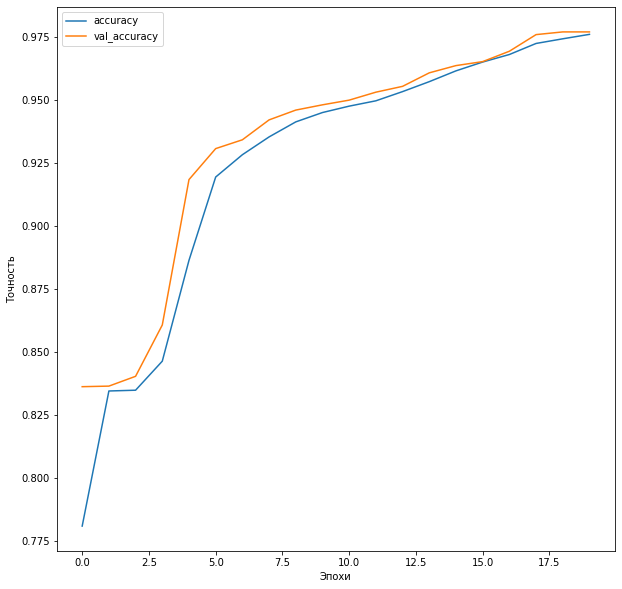

In [312]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(10,10))
plt.ylabel('Точность')
plt.xlabel('Эпохи')

Text(0.5, 0, 'Эпохи')

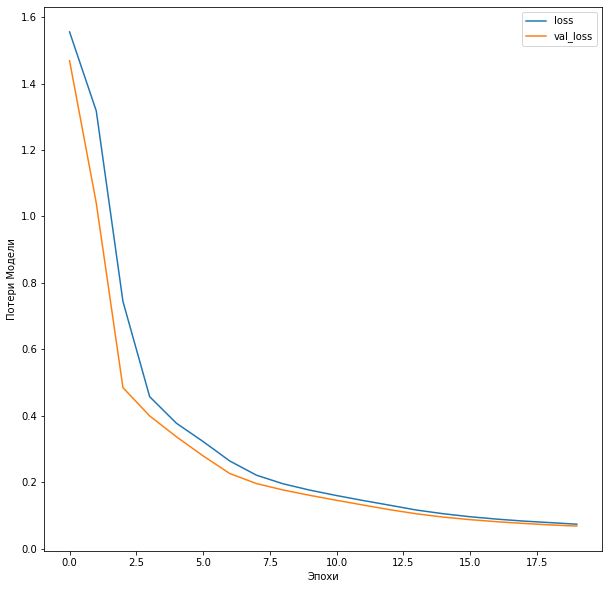

In [313]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(10,10))
plt.ylabel('Потери Модели')
plt.xlabel('Эпохи')

## Тестирование модели

<b> Модель xgb Градиентный Бустинг показал наивысшубю точность на валидайионной выборке. <br>
Проведем тестирование модели на тестовой выбоаке.</b>

In [318]:
predicted_test = xgb_classifier.predict(X_test)

In [319]:
valid_accuracy = metrics.accuracy_score(y_test, xgb_classifier.predict(X_test))
print("Точность на тетовом наборе данных ", valid_accuracy)

Точность на тетовом наборе данных  0.994253262118856
